In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [4]:
train_file_name = r'data/kaggle-otto/train.csv'
train = pd.read_csv(train_file_name)
print(train.shape)
train.head(3)

(61878, 95)


,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1


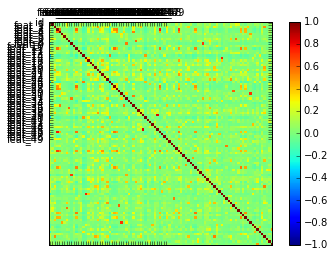

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy

names = train.columns
correlations = train.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,50,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [3]:
test_file_name = r'data/kaggle-otto/test.csv'
test = pd.read_csv(test_file_name)
print(test.shape)
test.head(3)

(144368, 94)


,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,0,0,0,0,0,0,0,0,...,0,0,11,1,20,0,0,0,0,0
1,2,2,2,14,16,0,0,0,0,0,...,0,0,0,0,0,4,0,0,2,0
2,3,0,1,12,1,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1


In [4]:
#Labels the target column, drop the id and target columns
def label_and_clean(train, test):
    le = LabelEncoder()
    le.fit(train.target)
    labels = le.transform(train.target) 
    classes = list(le.classes_) 
    test_ids = test.id
    Y = train['target']
    train.drop(['id', 'target'], axis=1, inplace=True)
    test.drop(['id'], axis=1, inplace=True)
    X = train
    
    return train, test, labels, classes, test_ids, X, Y

In [5]:
train, test, labels, classes, test_ids, X, Y = label_and_clean(train, test)
#test.head(5)

In [6]:
from sklearn import cross_validation
test_size = 0.33
train_test_seed = 7
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, Y, test_size=test_size, random_state=train_test_seed)

In [7]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    #NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(), #78%
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 76.7434%
Log Loss: 3.73999425468
SVC
****Results****
Accuracy: 60.9647%
Log Loss: 0.878790070614
DecisionTreeClassifier
****Results****
Accuracy: 70.4114%
Log Loss: 10.2195537208
RandomForestClassifier
****Results****
Accuracy: 77.3213%
Log Loss: 1.58595466143
AdaBoostClassifier
****Results****
Accuracy: 69.2311%
Log Loss: 2.00807854076
GradientBoostingClassifier
****Results****
Accuracy: 78.3741%
Log Loss: 0.60606396774
GaussianNB
****Results****
Accuracy: 60.8766%
Log Loss: 7.44410252036
LinearDiscriminantAnalysis
****Results****
Accuracy: 70.1861%
Log Loss: 0.911911306357
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 66.2096%
Log Loss: 6.06503537714


In [1]:
#try xgboost here

NameError: name 'train' is not defined